In [5]:
import numpy as np 
import pandas as pd 
from subprocess import check_output
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns


In [19]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [22]:
url1='https://raw.githubusercontent.com/madhu892/Alcohol-vs-studies-EDA-Model/master/student-mat.csv'
url2 = 'https://raw.githubusercontent.com/madhu892/Alcohol-vs-studies-EDA-Model/master/student-por.csv'

In [23]:
df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)

MERGE DATASETS

In [25]:
df_list = [pd.read_csv('https://raw.githubusercontent.com/madhu892/Alcohol-vs-studies-EDA-Model/master/student-%s.csv'%course) for course in ['mat', 'por']]
df_list[0]['class'] = 'mat'
df_list[1]['class'] = 'por'
df = df_list[0].append(df_list[1])
F_count = df.groupby(['sex'])['school'].count()[0]
M_count = df.groupby(['sex'])['school'].count()[1]

EDA

In [26]:
df.head(5)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,mat
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,mat
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,mat
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,mat
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,mat


In [27]:
df.shape

(1044, 34)

In [28]:

F_count

591

In [29]:
M_count


453

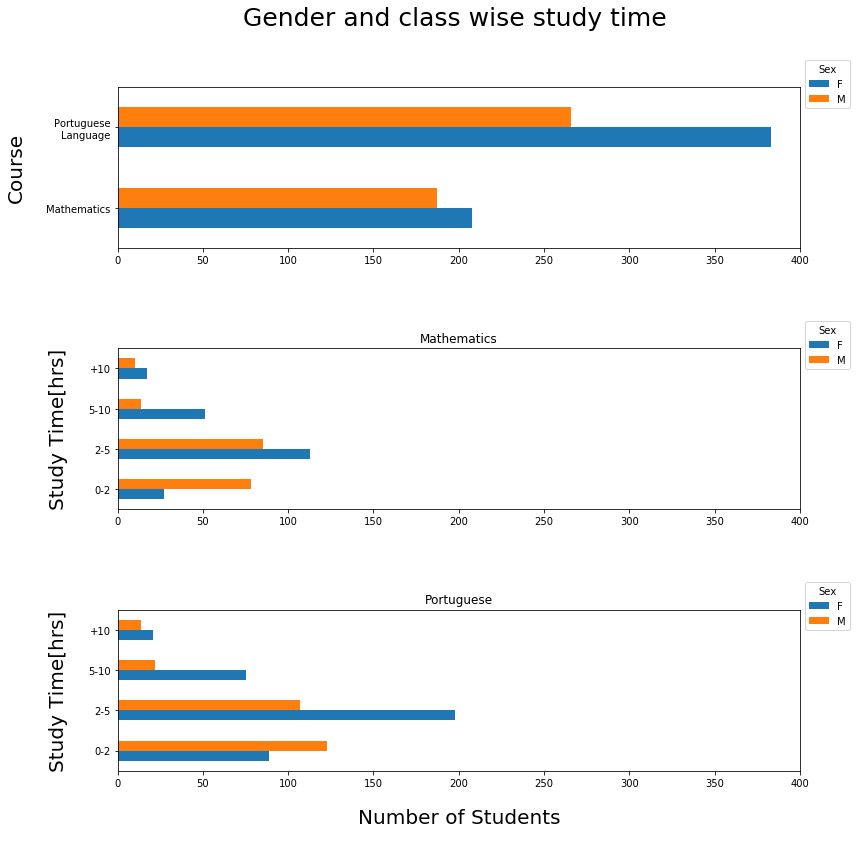

In [30]:
fig, axes = plt.subplots(3,1,figsize=(12,12))


df_temp = df.groupby(['class','sex']).size().to_frame(name='Count').reset_index()
df_temp2 = df_temp.pivot(index='class', columns='sex', values='Count')
ax = df_temp2.plot(ax=axes[0], kind='barh')
ax.set_xlabel(" ", fontsize=20, labelpad = 20)
ax.set_ylabel("Course", fontsize=20, labelpad = 20)
ax.set_yticklabels(['Mathematics','Portuguese\nLanguage'])
ax.set_xlim([0,400])

df_temp = df[df['class']=='mat'].groupby(['studytime','sex']).size().to_frame(name='Count').reset_index()
df_temp2 = df_temp.pivot(index='studytime', columns='sex', values='Count')
ax = df_temp2.plot(ax=axes[1], kind='barh')
ax.set_title('Mathematics')
ax.set_xlabel(" ", fontsize=20, labelpad = 20)
ax.set_ylabel("Study Time[hrs]", fontsize=20, labelpad = 20)
ax.set_yticklabels(['0-2','2-5','5-10','+10'])
ax.set_xlim([0,400])

df_temp = df[df['class']=='por'].groupby(['studytime','sex']).size().to_frame(name='Count').reset_index()
df_temp2 = df_temp.pivot(index='studytime', columns='sex', values='Count')
ax = df_temp2.plot(ax=axes[2], kind='barh')
ax.set_title('Portuguese')
ax.set_xlabel(" ", fontsize=20, labelpad = 20)
ax.set_ylabel("Study Time[hrs]", fontsize=20, labelpad = 20)
ax.set_yticklabels(['0-2','2-5','5-10','+10'])
ax.set_xlim([0,400])



ax.set_xlabel("Number of Students\n", fontsize=20, labelpad = 20)
leg = axes[0].legend(bbox_to_anchor=(1,1.2), loc='upper left', ncol=1)
leg.set_title('Sex')
leg = axes[1].legend(bbox_to_anchor=(1,1.2), loc='upper left', ncol=1)
leg.set_title('Sex')
leg = axes[2].legend(bbox_to_anchor=(1,1.2), loc='upper left', ncol=1)
leg.set_title('Sex')
axes[0].set_title('Gender and class wise study time \n\n',fontsize=25)
fig.tight_layout()

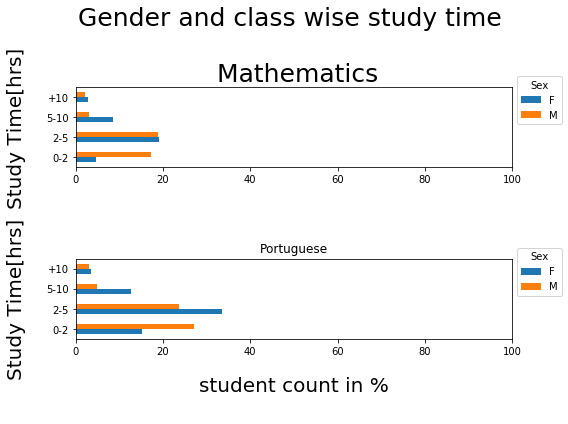

In [31]:
fig, axes = plt.subplots(2,1,figsize=(8,6))


df_temp = df[df['class']=='mat'].groupby(['studytime','sex']).size().to_frame(name='Count').reset_index()
df_temp.loc[(df_temp['sex']=='M'),'Count'] = 100*df_temp[(df_temp['sex']=='M')]['Count']/M_count
df_temp.loc[(df_temp['sex']=='F'),'Count'] = 100*df_temp[(df_temp['sex']=='F')]['Count']/F_count
df_temp2 = df_temp.pivot(index='studytime', columns='sex', values='Count')
ax = df_temp2.plot(ax=axes[0], kind='barh')
ax.set_title('Mathematics\n')
ax.set_xlabel(" ", fontsize=20, labelpad = 20)
ax.set_ylabel("Study Time[hrs]", fontsize=20, labelpad = 20)
ax.set_yticklabels(['0-2','2-5','5-10','+10'])
ax.set_xlim([0,100])

df_temp = df[df['class']=='por'].groupby(['studytime','sex']).size().to_frame(name='Count').reset_index()
df_temp.loc[(df_temp['sex']=='M'),'Count'] = 100*df_temp[(df_temp['sex']=='M')]['Count']/M_count
df_temp.loc[(df_temp['sex']=='F'),'Count'] = 100*df_temp[(df_temp['sex']=='F')]['Count']/F_count
df_temp2 = df_temp.pivot(index='studytime', columns='sex', values='Count')
ax = df_temp2.plot(ax=axes[1], kind='barh')
ax.set_title('Portuguese')
ax.set_xlabel(" ", fontsize=20, labelpad = 20)
ax.set_ylabel("Study Time[hrs]", fontsize=20, labelpad = 20)
ax.set_yticklabels(['0-2','2-5','5-10','+10'])
ax.set_xlim([0,100])


ax.set_xlabel("student count in %\n", fontsize=20, labelpad = 20)
leg = axes[0].legend(bbox_to_anchor=(1,1.2), loc='upper left', ncol=1)
leg.set_title('Sex')
leg = axes[1].legend(bbox_to_anchor=(1,1.2), loc='upper left', ncol=1)
leg.set_title('Sex')
axes[0].set_title('Gender and class wise study time \n\n Mathematics',fontsize=25)
fig.tight_layout()


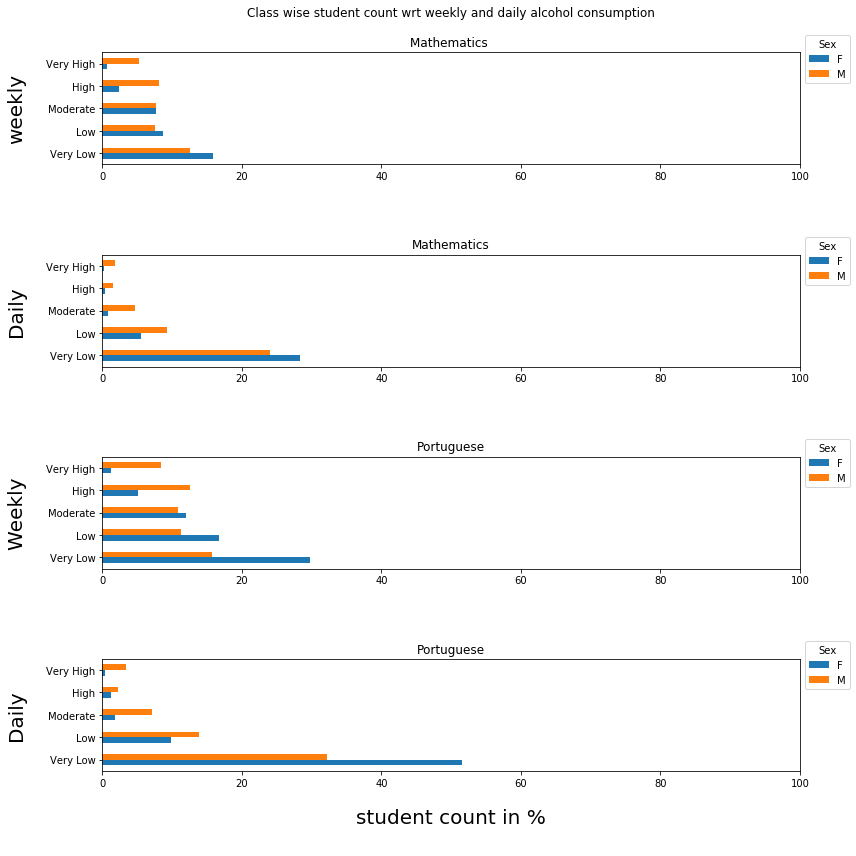

In [32]:
fig, axes = plt.subplots(4,1,figsize=(12,12))


df_temp = df[df['class']=='mat'].groupby(['Walc','sex']).size().to_frame(name='Count').reset_index()
df_temp.loc[(df_temp['sex']=='M'),'Count'] = 100*df_temp[(df_temp['sex']=='M')]['Count']/M_count
df_temp.loc[(df_temp['sex']=='F'),'Count'] = 100*df_temp[(df_temp['sex']=='F')]['Count']/F_count
df_temp2 = df_temp.pivot(index='Walc', columns='sex', values='Count')
ax = df_temp2.plot(ax=axes[0], kind='barh')
ax.set_title('Mathematics')
ax.set_xlabel(" ", fontsize=20, labelpad = 20)
ax.set_ylabel("weekly", fontsize=20, labelpad = 20)
ax.set_yticklabels(['Very Low','Low','Moderate','High','Very High'])
ax.set_xlim([0,100])

df_temp = df[df['class']=='mat'].groupby(['Dalc','sex']).size().to_frame(name='Count').reset_index()
df_temp.loc[(df_temp['sex']=='M'),'Count'] = 100*df_temp[(df_temp['sex']=='M')]['Count']/M_count
df_temp.loc[(df_temp['sex']=='F'),'Count'] = 100*df_temp[(df_temp['sex']=='F')]['Count']/F_count
df_temp2 = df_temp.pivot(index='Dalc', columns='sex', values='Count')
ax = df_temp2.plot(ax=axes[1], kind='barh')
ax.set_title('Mathematics')
ax.set_xlabel(" ", fontsize=20, labelpad = 20)
ax.set_ylabel("Daily", fontsize=20, labelpad = 20)
ax.set_yticklabels(['Very Low','Low','Moderate','High','Very High'])
ax.set_xlim([0,100])


df_temp = df[df['class']=='por'].groupby(['Walc','sex']).size().to_frame(name='Count').reset_index()
df_temp.loc[(df_temp['sex']=='M'),'Count'] = 100*df_temp[(df_temp['sex']=='M')]['Count']/M_count
df_temp.loc[(df_temp['sex']=='F'),'Count'] = 100*df_temp[(df_temp['sex']=='F')]['Count']/F_count
df_temp2 = df_temp.pivot(index='Walc', columns='sex', values='Count')
ax = df_temp2.plot(ax=axes[2], kind='barh')
ax.set_title('Portuguese')
ax.set_xlabel(" ", fontsize=20, labelpad = 20)
ax.set_ylabel("Weekly", fontsize=20, labelpad = 20)
ax.set_yticklabels(['Very Low','Low','Moderate','High','Very High'])
ax.set_xlim([0,100])

df_temp = df[df['class']=='por'].groupby(['Dalc','sex']).size().to_frame(name='Count').reset_index()
df_temp.loc[(df_temp['sex']=='M'),'Count'] = 100*df_temp[(df_temp['sex']=='M')]['Count']/M_count
df_temp.loc[(df_temp['sex']=='F'),'Count'] = 100*df_temp[(df_temp['sex']=='F')]['Count']/F_count
df_temp2 = df_temp.pivot(index='Dalc', columns='sex', values='Count')
ax = df_temp2.plot(ax=axes[3], kind='barh')
ax.set_title('Portuguese')
ax.set_xlabel(" ", fontsize=20, labelpad = 20)
ax.set_ylabel("Daily", fontsize=20, labelpad = 20)
ax.set_yticklabels(['Very Low','Low','Moderate','High','Very High'])
ax.set_xlim([0,100])

ax.set_xlabel("student count in %\n", fontsize=20, labelpad = 20)
axes[0].set_title("Class wise student count wrt weekly and daily alcohol consumption\n \nMathematics ")
leg = axes[0].legend(bbox_to_anchor=(1,1.2), loc='upper left', ncol=1)
leg.set_title('Sex')
leg = axes[1].legend(bbox_to_anchor=(1,1.2), loc='upper left', ncol=1)
leg.set_title('Sex')
leg = axes[2].legend(bbox_to_anchor=(1,1.2), loc='upper left', ncol=1)
leg.set_title('Sex')
leg = axes[3].legend(bbox_to_anchor=(1,1.2), loc='upper left', ncol=1)
leg.set_title('Sex')

fig.tight_layout()

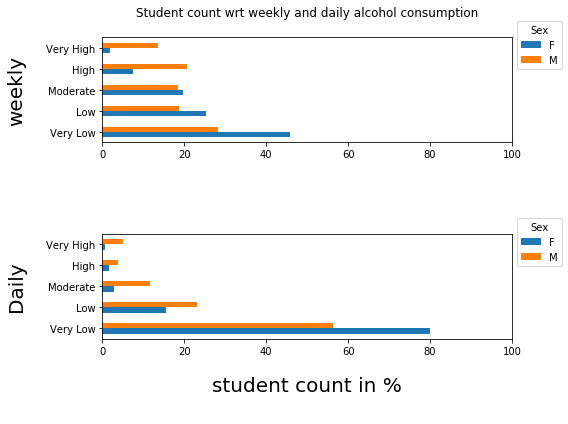

In [33]:
fig, axes = plt.subplots(2,1,figsize=(8,6))


df_temp = df.groupby(['Walc','sex']).size().to_frame(name='Count').reset_index()
df_temp.loc[(df_temp['sex']=='M'),'Count'] = 100*df_temp[(df_temp['sex']=='M')]['Count']/M_count
df_temp.loc[(df_temp['sex']=='F'),'Count'] = 100*df_temp[(df_temp['sex']=='F')]['Count']/F_count
df_temp2 = df_temp.pivot(index='Walc', columns='sex', values='Count')
ax = df_temp2.plot(ax=axes[0], kind='barh')
ax.set_xlabel(" ", fontsize=20, labelpad = 20)
ax.set_ylabel("weekly", fontsize=20, labelpad = 20)
ax.set_yticklabels(['Very Low','Low','Moderate','High','Very High'])
ax.set_xlim([0,100])

df_temp = df.groupby(['Dalc','sex']).size().to_frame(name='Count').reset_index()
df_temp.loc[(df_temp['sex']=='M'),'Count'] = 100*df_temp[(df_temp['sex']=='M')]['Count']/M_count
df_temp.loc[(df_temp['sex']=='F'),'Count'] = 100*df_temp[(df_temp['sex']=='F')]['Count']/F_count
df_temp2 = df_temp.pivot(index='Dalc', columns='sex', values='Count')
ax = df_temp2.plot(ax=axes[1], kind='barh')
ax.set_xlabel(" ", fontsize=20, labelpad = 20)
ax.set_ylabel("Daily", fontsize=20, labelpad = 20)
ax.set_yticklabels(['Very Low','Low','Moderate','High','Very High'])
ax.set_xlim([0,100])


ax.set_xlabel("student count in %\n", fontsize=20, labelpad = 20)
axes[0].set_title("Student count wrt weekly and daily alcohol consumption\n ")
leg = axes[0].legend(bbox_to_anchor=(1,1.2), loc='upper left', ncol=1)
leg.set_title('Sex')
leg = axes[1].legend(bbox_to_anchor=(1,1.2), loc='upper left', ncol=1)
leg.set_title('Sex')

fig.tight_layout()


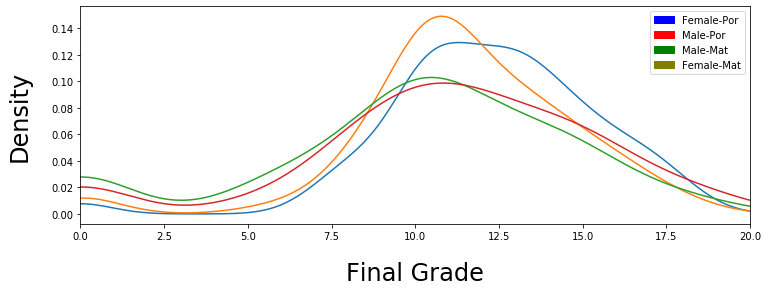

In [34]:
df[(df['sex']=='F') & (df['class']=='por')]['G3'].plot(kind='kde')
ax = df[(df['sex']=='M') & (df['class']=='por')]['G3'].plot(kind='kde',figsize=(12,4))
ax.set_xlabel("Final Grade", fontsize=24, labelpad = 20)
ax.set_ylabel("P (Grade)", fontsize=24, labelpad = 20)
ax.set_xlim(0,20)
M_patch = mpatches.Patch(color='red',label='Male')
F_patch = mpatches.Patch(color='blue', label='Female')
ax.legend(handles=[F_patch, M_patch])

df[(df['sex']=='F') & (df['class']=='mat')]['G3'].plot(kind='kde')#alpha=0.75, bins=20)
ax = df[(df['sex']=='M') & (df['class']=='mat')]['G3'].plot(kind='kde',figsize=(12,4))#,alpha=0.75, bins=20)
ax.set_xlabel("Final Grade", fontsize=24, labelpad = 20)

ax.set_xlim(0,20)

M_patch = mpatches.Patch(color='red',label='Male-Por')
F_patch = mpatches.Patch(color='blue', label='Female-Por')
ff_patch = mpatches.Patch(color='green',label='Male-Mat')
mm_patch = mpatches.Patch(color='olive', label='Female-Mat')
ax.legend(handles=[F_patch, M_patch,ff_patch, mm_patch])
plt.show()

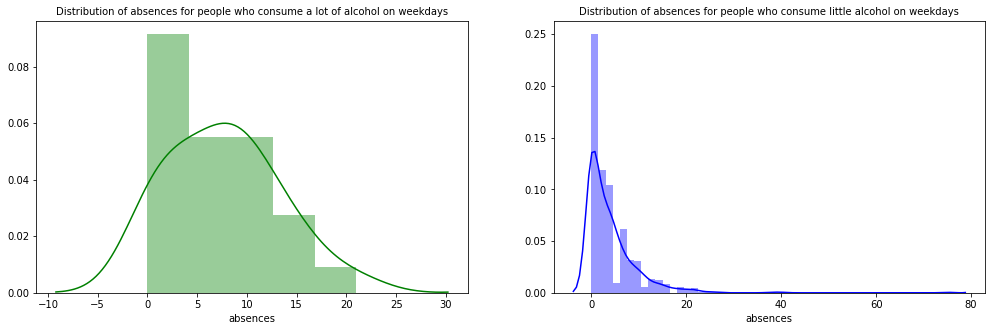

In [35]:
f= plt.figure(figsize=(17,5))
ax=f.add_subplot(121)
sns.distplot(df[(df.Dalc == 5)]["absences"],color='green',ax=ax)
ax.set_title('Distribution of absences for people who consume a lot of alcohol on weekdays',fontsize=10)

ax=f.add_subplot(122)
sns.distplot(df[(df.Dalc == 1)]['absences'],color='blue',ax=ax)
ax.set_title('Distribution of absences for people who consume little alcohol on weekdays',fontsize=10)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

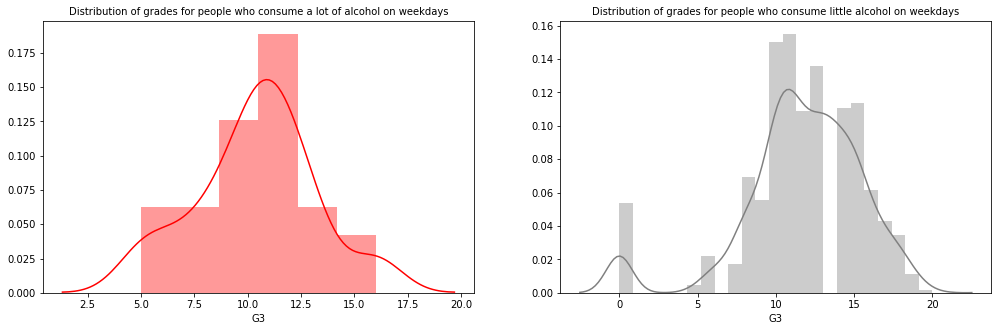

In [36]:
f= plt.figure(figsize=(17,5))
ax=f.add_subplot(121)
sns.distplot(df[(df.Dalc == 5)]["G3"],color='red',ax=ax)
ax.set_title('Distribution of grades for people who consume a lot of alcohol on weekdays',fontsize=10)

ax=f.add_subplot(122)
sns.distplot(df[(df.Dalc == 1)]['G3'],color='gray',ax=ax)
ax.set_title('Distribution of grades for people who consume little alcohol on weekdays',fontsize=10)
plt.show

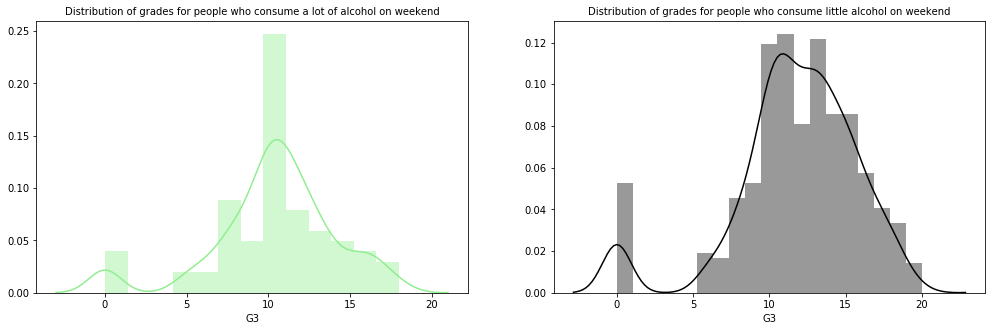

In [37]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.Walc == 5)]["G3"],color='lightgreen',ax=ax)
ax.set_title('Distribution of grades for people who consume a lot of alcohol on weekend',fontsize=10)

ax=f.add_subplot(122)
sns.distplot(df[(df.Walc == 1)]['G3'],color='black',ax=ax)
ax.set_title('Distribution of grades for people who consume little alcohol on weekend',fontsize=10)
plt.show()

modelling

In [41]:
import pandas as pd
import numpy as np
import matplotlib

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [42]:
from pandas import DataFrame, Series
df1=DataFrame(df)


In [43]:
df2=pd.get_dummies(df1)


In [44]:
df2.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes', 'class_mat', 'class_por'],
      dtype='object')

In [45]:
X=df2.drop('G3',axis=1)
y=df2['G3']

Split the data into train and test

In [47]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

In [48]:
X.head(5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,class_mat,class_por
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0


In [49]:
y.head(5)

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Linear Regression  model

In [51]:

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
from sklearn.metrics import mean_squared_error
rd_rmse=np.sqrt(mean_squared_error(y_train,regr.predict(X_train)))
rd_rmse

1.536433131828295

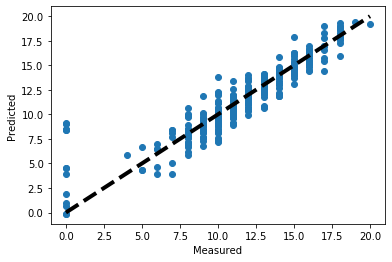

In [53]:
predicted = cross_val_predict(regr, X_test, y_test, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


In [54]:
regr.score(X_test,y_test)

0.8394391057290571

In [57]:

import statsmodels.api as sm
model = sm.OLS(y, X).fit()
residuals = model.resid
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     131.0
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:38:59   Log-Likelihood:                -1915.4
No. Observations:                1044   AIC:                             3917.
Df Residuals:                    1001   BIC:                             4130.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                  -0.0373      0.046     -0.803      0.422      -0.129       0.054
Medu                 -0.0074      0.071     -0.105      0.917      -0.146       0.131
Fedu                 -0.0346      0.063     -0.551      0.582      -0.158       0.089
traveltime            0.1355      0.074      1.825      0.068      -0.010       0.281
studytime            -0.0143      0.065     -0.219      0.827      -0.142       0.113
failures             -0.2347      0.087     -2.697      0.007      -0.405      -0.064
famrel                0.0968      0.054      1.784      0.075      -0.010       0.203
freetime              0.0104      0.052      0.199      0.842      -0.092       0.113
goout                -0.0296      0.050     -0.592      0.554      -0.128       0.068
Dalc                 -0.0662      0.072     -0.923      0.356      -0.207       0.075
Walc                  0.0517      0.055      0.939      0.348      -0.056       0.160
health               -0.0191      0.036     -0.533      0.594      -0.090       0.051
absences              0.0358      0.008      4.230      0.000       0.019       0.052
G1                    0.1437      0.033      4.355      0.000       0.079       0.208
G2                    0.9360      0.030     31.690      0.000       0.878       0.994
school_GP            -0.0386      0.084     -0.463      0.644      -0.203       0.125
school_MS            -0.0357      0.092     -0.390      0.697      -0.215       0.144
sex_F                -0.0448      0.078     -0.570      0.569      -0.199       0.109
sex_M                -0.0296      0.081     -0.365      0.715      -0.188       0.129
address_R            -0.0959      0.086     -1.111      0.267      -0.265       0.074
address_U             0.0216      0.080      0.269      0.788      -0.136       0.179
famsize_GT3          -0.0395      0.078     -0.507      0.612      -0.192       0.113
famsize_LE3          -0.0348      0.080     -0.433      0.665      -0.193       0.123
Pstatus_A             0.0373      0.098      0.380      0.704      -0.156       0.230
Pstatus_T            -0.1117      0.098     -1.143      0.253      -0.303       0.080
Mjob_at_home         -0.0855      0.130     -0.657      0.511      -0.341       0.170
Mjob_health           0.0566      0.161      0.351      0.726      -0.260       0.373
Mjob_other           -0.1230      0.095     -1.288      0.198      -0.310       0.064
Mjob_services         0.0506      0.103      0.493      0.622      -0.151       0.252
Mjob_teacher          0.0271      0.146      0.186      0.853      -0.258       0.313
Fjob_at_home          0.1901      0.183      1.037      0.300      -0.170       0.550
Fjob_health           0.1017      0.217      0.469      0.640      -0.324       0.528
Fjob_other           -0.0247      0.105     -0.236      0.814      -0.230